In [1]:
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
basedir = Path("/Users/amulyagarimella/Downloads/242 data/drive-download-20241204T144424Z-002/amulya-typer-bert-imdb-512").resolve()

In [3]:
agp = Path(basedir / "0.5sparsity-10epochs-agp1prune-kdTrue-alpha0.5-temp4.0-loraTrue-lorarank32").resolve()
lin1 = Path(basedir / "0.5sparsity-10epochs-linear1prune-kdTrue-alpha0.5-temp4.0-loraTrue-lorarank32").resolve()
lin2 = Path(basedir / "0.5sparsity-10epochs-linear2prune-kdTrue-alpha0.5-temp4.0-loraTrue-lorarank32").resolve()

In [4]:
agp_results = pl.read_csv(agp / "custom_eval.csv")
lin1_results = pl.read_csv(lin1 / "custom_eval.csv")
lin2_results = pl.read_csv(lin2 / "custom_eval.csv")

In [8]:
results_df = pl.concat([agp_results, lin1_results, lin2_results])
method = np.array(["AGP, prune every epoch"] * len(agp_results) + ["Constant, prune every epoch"] * len(lin1_results) + ["Constant, prune every 2 epochs"] * len(lin2_results))
results_df = results_df.with_columns([pl.Series("method", method)])



<Axes: xlabel='epoch', ylabel='eval_accuracy'>

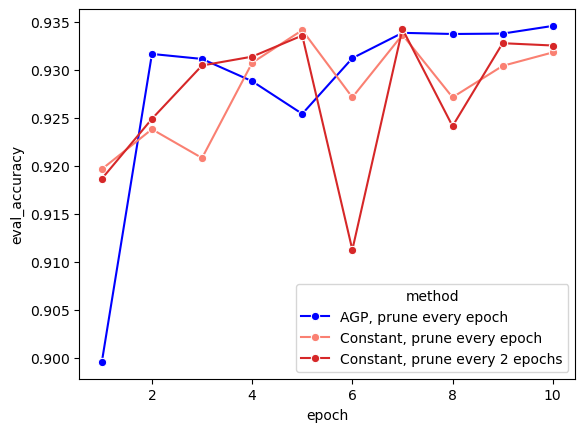

In [9]:
sns.lineplot(data=results_df, x="epoch", y="eval_accuracy", hue="method", palette=["b", "salmon", "tab:red"], marker="o")

<Axes: xlabel='epoch', ylabel='eval_loss'>

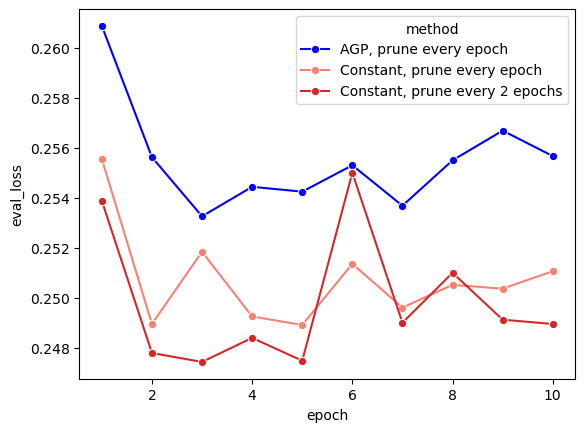

In [10]:
sns.lineplot(data=results_df, x="epoch", y="eval_loss", hue="method", palette=["b", "salmon", "tab:red"], marker="o")